Introduction:  aim to predict employee salaries using machine learning techniques. We'll use two models:
🔹 Linear Regression (for baseline)
🔹 XGBoost Regressor (for improved performance)

In [20]:
# 1. Load & Explore Dataset
import pandas as pd

df = pd.read_csv('/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv')
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


**Data Visualization**
- **Salary Distribution**
- **Education vs Salary** 
- **Gender vs Salary**
- **Experience vs Salary**


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


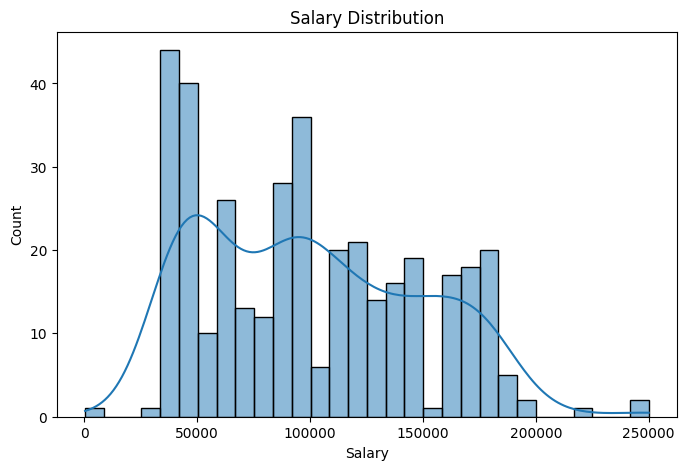

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()


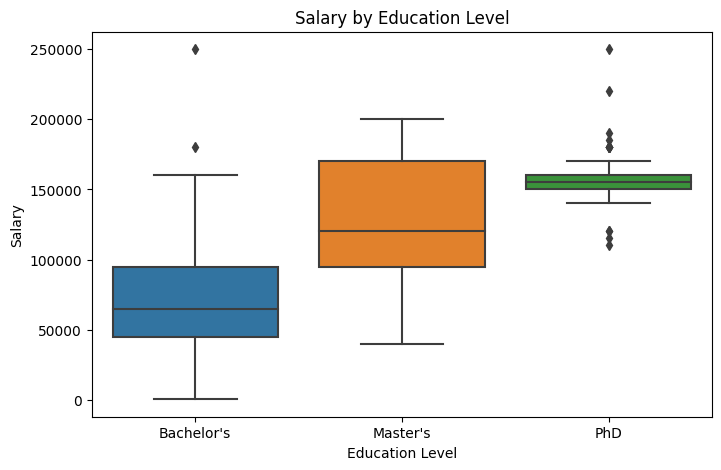

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary by Education Level')
plt.show()


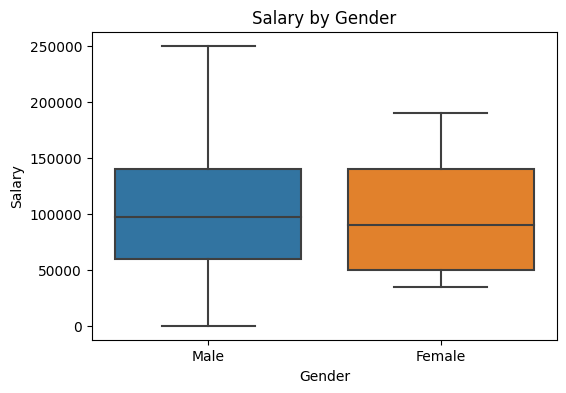

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary by Gender')
plt.show()


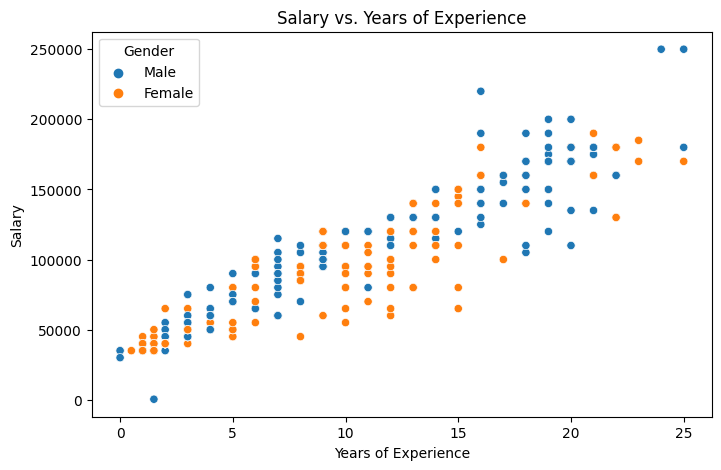

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Gender', data=df)
plt.title('Salary vs. Years of Experience')
plt.show()


**Data Preprocessing**
* We clean the dataset by:
- Removing irrelevant columns like `ID`, `Name`, `Joining Date`, etc.
- Handling missing values
- Encoding categorical variables using Label Encoding

In [26]:
df = df.dropna()


In [27]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Gender', 'Education Level', 'Job Title']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [28]:
X = df.drop('Salary', axis=1)
y = df['Salary']


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**We split the dataset into training and testing sets using an 80-20 ratio.**

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [32]:
# 7. Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R2: {r2:.2f}")

Linear Regression MSE: 249075656.43
Linear Regression R2: 0.90


**We use the XGBoost regressor to train on the same training set and compare results.**

In [39]:
import xgboost as xgb
# 6. Train XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xg_reg.fit(X_train, y_train)

# 7. Predict and evaluate
y_pred = xg_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Regression MSE: {mse:.2f}")
print(f"XGBoost Regression R2: {r2:.2f}")

XGBoost Regression MSE: 165669779.91
XGBoost Regression R2: 0.93
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=1, reg_lambda=2, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=9, n_estimators=50, reg_alpha=0, reg_lambda=2, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, n_estimator